<a href="https://colab.research.google.com/github/zalfanurjihan/Zalfa-Projects/blob/main/Project_Data_Analysis_for_Finance_Investor_Investment_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Data Analysis for Finance: Proses Investasi Investor**
**Project bahasa pemrograman R di DQLab Academy**

**Data Mentor**: **Farkhan Novianto
Head of Data Analytics
AMARTHA**

# **Self Introduction**
Nama: Zalfa Nurjihan

Email: zalfanjihan@gmail.com

# **Packages and Data Used**

**Start *rmagic* by executing this in a cell**

In [ ]:
%load_ext rpy2.ipython

**Reading datasets**

In [ ]:
%%R 
df_event <- read.csv('https://storage.googleapis.com/dqlab-dataset/event.csv', stringsAsFactors = F)

In [ ]:
%%R
dplyr::glimpse(df_event)

Rows: 33,571
Columns: 4
$ loan_id     <int> 2, 2, 2, 133, 133, 133, 2693, 2693, 2693, 6, 6, 6, 2769, 2…
$ investor_id <int> 114, 114, 114, 114, 114, 114, 8159, 8159, 8159, 163, 163, …
$ nama_event  <chr> "investor_view_loan", "investor_order_loan", "investor_pay…
$ created_at  <chr> "2019-07-07 11:47:58", "2019-07-07 11:48:16", "2019-07-07 …


**Change the created_at column to timestamp type**

In [ ]:
%%R 
library(lubridate)
df_event$created_at <- ymd_hms(df_event$created_at)
dplyr::glimpse(df_event)

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Rows: 33,571
Columns: 4
$ loan_id     <int> 2, 2, 2, 133, 133, 133, 2693, 2693, 2693, 6, 6, 6, 2769, 2…
$ investor_id <int> 114, 114, 114, 114, 114, 114, 8159, 8159, 8159, 163, 163, …
$ nama_event  <chr> "investor_view_loan", "investor_order_loan", "investor_pay…
$ created_at  <dttm> 2019-07-07 11:47:58, 2019-07-07 11:48:16, 2019-07-07 13:1…


# **Summary Event**

In [ ]:
%%R
library(dplyr)
df_event %>% group_by(nama_event) %>% 
    summarise(jumlah_event = n(), 
              loan = n_distinct(loan_id), 
              investor = n_distinct(investor_id))

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 5 × 4
  nama_event          jumlah_event  loan investor
  <chr>                      <int> <int>    <int>
1 investor_order_loan         3714  3641      804
2 investor_pay_loan           3632  3632      771
3 investor_register          17931     1    17931
4 investor_view_loan          4616  3678     1095
5 loan_to_marketplace         3678  3678        1


**Changing the loan investment process data format so the event name becomes a column name**

**Event loan uploaded to marketplace**

In [ ]:
%%R
df_marketplace <-df_event %>% 
    filter(nama_event == 'loan_to_marketplace') %>% 
    select(loan_id, marketplace = created_at) 
df_marketplace

     loan_id         marketplace
1          1 2019-07-06 09:03:04
2          2 2019-07-06 09:00:00
3          3 2019-07-06 09:03:04
4          4 2019-07-06 09:03:04
5          5 2019-07-05 11:45:07
6          6 2019-07-08 16:35:28
7          7 2019-07-14 10:16:27
8          8 2019-07-05 11:45:07
9          9 2019-07-05 11:45:07
10        10 2019-07-10 15:45:36
11        11 2019-07-14 10:16:27
12        12 2019-07-14 10:16:27
13        13 2019-07-10 12:13:59
14        14 2019-07-14 10:16:27
15        15 2019-07-23 10:30:49
16        16 2019-07-15 11:00:57
17        17 2019-07-11 10:16:39
18        18 2019-07-16 11:31:52
19        19 2019-07-16 15:00:16
20        20 2019-07-23 10:30:49
21        21 2019-07-23 10:30:49
22        22 2019-07-23 10:30:49
23        23 2019-07-19 14:07:38
24        24 2019-07-16 15:00:16
25        25 2019-07-16 15:00:16
26        26 2019-07-16 15:00:16
27        27 2019-07-17 13:17:59
28        28 2019-07-23 13:52:50
29        29 2019-07-18 17:39:36
30        

**Event investors see loan details**

In [ ]:
%%R
df_view_loan <- df_event %>% 
    filter(nama_event == 'investor_view_loan') %>% 
    group_by(loan_id, investor_id) %>% 
    summarise(jumlah_view = n(), 
              pertama_view = min(created_at), 
              terakhir_view = max(created_at))
df_view_loan

`summarise()` has grouped output by 'loan_id'. You can override using the `.groups` argument.
# A tibble: 4,309 × 5
# Groups:   loan_id [3,678]
   loan_id investor_id jumlah_view pertama_view        terakhir_view      
     <int>       <int>       <int> <dttm>              <dttm>             
 1       1         107           1 2019-07-07 11:48:11 2019-07-07 11:48:11
 2       2         114           1 2019-07-07 11:47:58 2019-07-07 11:47:58
 3       3          97           1 2019-07-06 09:50:00 2019-07-06 09:50:00
 4       4          97           1 2019-07-06 09:49:20 2019-07-06 09:49:20
 5       5         107           1 2019-07-05 12:54:25 2019-07-05 12:54:25
 6       6         163           1 2019-07-08 16:40:31 2019-07-08 16:40:31
 7       7         133           2 2019-07-14 11:04:46 2019-07-14 11:16:18
 8       8          71           1 2019-07-05 11:47:10 2019-07-05 11:47:10
 9       8          79           1 2019-07-05 12:05:14 2019-07-05 12:05:14
10       9          79         

**Event investors order and pay loans**

In [ ]:
%%R
library(tidyr)
df_order_pay <- df_event %>%
    filter(nama_event %in% c('investor_order_loan', 'investor_pay_loan')) %>%
    spread(nama_event, created_at) %>%
    select(loan_id, investor_id, order = investor_order_loan, 
           pay = investor_pay_loan)
df_order_pay

     loan_id investor_id               order                 pay
1          1         107 2019-07-07 11:48:57 2019-07-07 12:02:18
2          2         114 2019-07-07 11:48:16 2019-07-07 13:14:39
3          3          97 2019-07-06 09:50:02 2019-07-06 10:14:44
4          4          97 2019-07-06 09:49:23 2019-07-06 09:59:51
5          5         107 2019-07-05 12:55:15 2019-07-05 13:55:54
6          6         163 2019-07-08 16:42:03 2019-07-08 16:45:56
7          7         133 2019-07-14 11:16:54 2019-07-14 11:22:00
8          8          79 2019-07-05 12:06:21 2019-07-05 17:04:56
9          9          79 2019-07-05 12:11:43 2019-07-05 17:04:52
10        10         107 2019-07-10 15:57:07 2019-07-10 16:19:07
11        11         133 2019-07-14 11:07:16 2019-07-14 11:22:04
12        12         133 2019-07-14 11:07:16 2019-07-14 11:22:04
13        13         202 2019-07-10 12:17:43 2019-07-10 13:01:46
14        14         107 2019-07-14 11:41:23 2019-07-14 11:50:03
15        15         487 

**Combined Investment Loan Data**

In [ ]:
%%R
df_loan_invest <- df_marketplace %>% 
    left_join(df_view_loan, by = 'loan_id') %>% 
    left_join(df_order_pay, by = c('loan_id','investor_id'))

df_loan_invest

Streaming output truncated to the last 5000 lines.
3621    3163 2020-03-16 07:14:24       10251           1 2020-03-16 19:07:49
3622    3164 2020-03-16 07:14:26       10251           1 2020-03-16 19:08:41
3623    3165 2020-03-15 07:34:04       11770           1 2020-03-16 17:12:26
3624    3165 2020-03-15 07:34:04       12958           1 2020-03-15 19:20:17
3625    3166 2020-03-18 06:10:10       13102           3 2020-03-18 14:52:33
3626    3167 2020-03-17 06:11:57        7409           1 2020-03-17 12:13:09
3627    3168 2020-03-16 07:14:26        3011           1 2020-03-16 12:11:10
3628    3169 2020-03-16 07:14:26       10251           1 2020-03-16 19:02:52
3629    3170 2020-03-15 07:34:02       10251           2 2020-03-16 18:46:03
3630    3171 2020-03-18 06:10:09       11230           1 2020-03-18 12:22:13
3631    3172 2020-03-17 06:11:58        9918           1 2020-03-17 15:09:38
3632    3173 2020-03-15 07:34:04       10252           1 2020-03-15 17:08:48
3633    3174 2020-03-16 0

# **Investment Process Analysis**

**See the relationship between the number of views and orders**

In [ ]:
%%R
df_loan_invest %>%
    mutate(status_order = ifelse( is.na(order), 'not_order','order')) %>% 
    count(jumlah_view, status_order) %>% 
    spread(status_order, n, fill = 0) %>%  
    mutate(persen_order = scales::percent(order/(order + not_order)))

  jumlah_view not_order order persen_order
1           1       570  3513        86.0%
2           2        20   173        89.6%
3           3         3    23        88.5%
4           4         0     3       100.0%
5           5         1     1        50.0%
6           7         0     1       100.0%
7          40         1     0         0.0%


**The time it takes for investors to order from the first time they see loan details**

In [ ]:
%%R 
df_loan_invest %>%
    filter(!is.na(order)) %>% 
    mutate(lama_order_view = as.numeric(difftime(order, pertama_view, units = "mins"))) %>% 
    group_by(jumlah_view) %>% 
    summarise_at(vars(lama_order_view), funs(total = n(), min, median, mean, max)) %>% 
    mutate_if(is.numeric, funs(round(.,2)))

# A tibble: 6 × 6
  jumlah_view total     min  median    mean    max
        <dbl> <dbl>   <dbl>   <dbl>   <dbl>  <dbl>
1           1  3513    0.03    1.35    2.97   79.6
2           2   173    0.43   22.1    61.1  2446. 
3           3    23    7.25   32.0    66.4   495. 
4           4     3   17.1    33.9    34.1    51.2
5           5     1 1113.   1113.   1113.   1113. 
6           7     1  549.    549.    549.    549. 


**Average order time since the loan is uploaded every week**

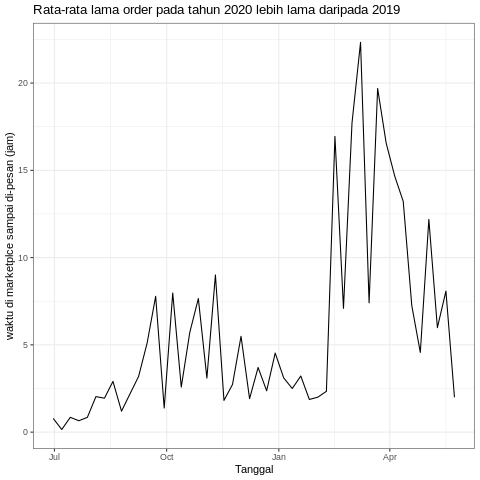

In [ ]:
%%R
library(ggplot2)
df_lama_order_per_minggu <- df_loan_invest %>%
    filter(!is.na(order)) %>%
    mutate(tanggal = floor_date(marketplace, 'week'),
           lama_order = as.numeric(difftime(order, marketplace, units = "hour"))) %>%
    group_by(tanggal) %>%
    summarise(lama_order = median(lama_order))
ggplot(df_lama_order_per_minggu) + 
       geom_line(aes(x = tanggal, y = lama_order)) +
       theme_bw() +
       labs(title = "Rata-rata lama order pada tahun 2020 lebih lama daripada 2019",
            x = "Tanggal",
            y = "waktu di marketplce sampai di-pesan (jam)")

**Does the Investor pay for the orders he/she makes.**

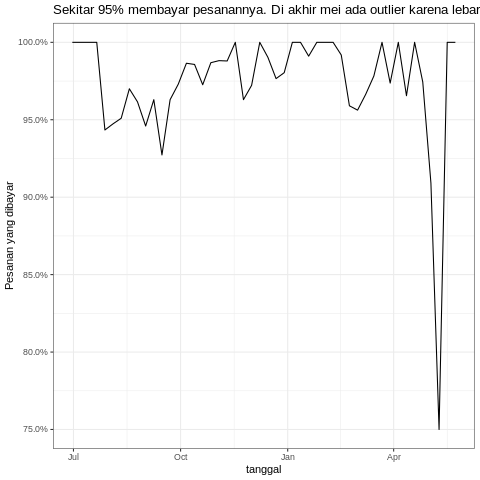

In [ ]:
%%R
df_bayar_per_minggu <- df_loan_invest %>% 
    filter(!is.na(order)) %>%
    mutate(tanggal = floor_date(marketplace, 'week')) %>% 
    group_by(tanggal) %>%
    summarise(persen_bayar = mean(!is.na(pay))) 
ggplot(df_bayar_per_minggu) +
  geom_line(aes(x = tanggal, y = persen_bayar)) +
  scale_y_continuous(labels = scales::percent) +
  theme_bw() + 
  labs(title="Sekitar 95% membayar pesanannya. Di akhir mei ada outlier karena lebaran", x="tanggal", y="Pesanan yang dibayar")

**The time it takes investors to pay for orders**

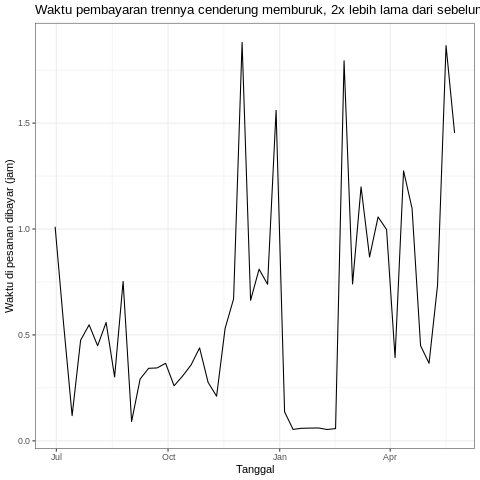

In [ ]:
%%R
df_lama_bayar_per_minggu <- df_loan_invest %>% 
    filter(!is.na(pay)) %>%
    mutate(tanggal = floor_date(order, 'week'),
           lama_bayar = as.numeric(difftime(pay, order, units = "hour"))) %>% 
    group_by(tanggal) %>%
    summarise(lama_bayar = median(lama_bayar)) 
ggplot(df_lama_bayar_per_minggu) +
    geom_line(aes(x =tanggal, y = lama_bayar)) +
    theme_bw() + 
    labs(title="Waktu pembayaran trennya cenderung memburuk, 2x lebih lama dari sebelumnya", x="Tanggal", y="Waktu di pesanan dibayar (jam)")

# **Investor Summary Analysis**

**Trend Investor Register**

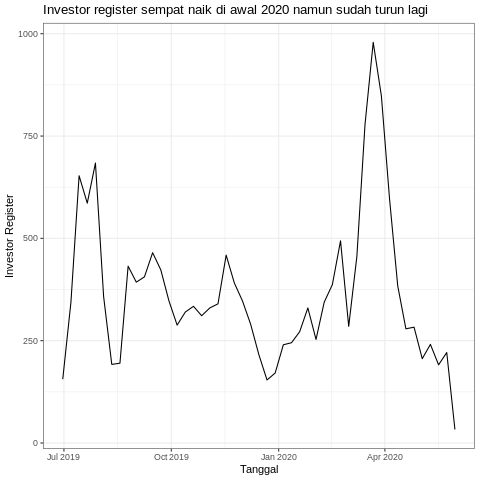

In [ ]:
%%R
df_investor_register <- df_event %>% 
    filter(nama_event=='investor_register') %>%
    mutate(tanggal = floor_date(created_at, 'week')) %>% 
    group_by(tanggal) %>%
    summarise(investor = n_distinct(investor_id)) 
ggplot(df_investor_register) +
    geom_line(aes(x = tanggal, y = investor)) +
    theme_bw() + 
    labs(title="Investor register sempat naik di awal 2020 namun sudah turun lagi",
    x="Tanggal", 
    y="Investor Register")

**Trend of First Investment Investor**

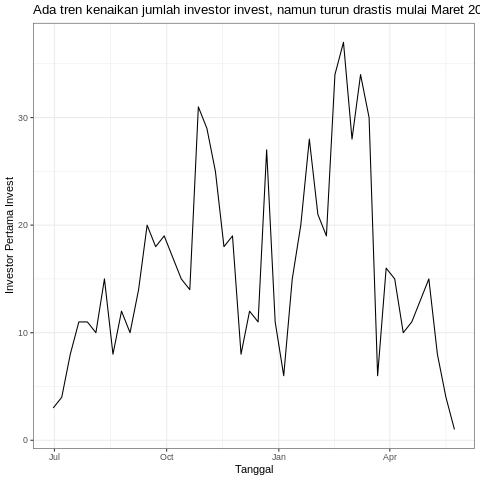

In [ ]:
%%R
df_investor_pertama_invest <- df_event %>% 
    filter(nama_event=='investor_pay_loan') %>%
    group_by(investor_id) %>% 
    summarise(pertama_invest =min(created_at)) %>% 
    mutate(tanggal = floor_date(pertama_invest, 'week')) %>% 
    group_by(tanggal) %>%
    summarise(investor = n_distinct(investor_id))
ggplot(df_investor_pertama_invest) +
  geom_line(aes(x = tanggal, y = investor)) +
  theme_bw() + 
  labs(title = "Ada tren kenaikan jumlah investor invest, namun turun drastis mulai Maret 2020", x = "Tanggal", y = "Investor Pertama Invest")

**First Cohort Invest by Register Month**

In [ ]:
%%R
df_register_per_investor <- df_event %>%
    filter(nama_event == 'investor_register') %>%
    rename(tanggal_register = created_at) %>%
    mutate(bulan_register = floor_date(tanggal_register, 'month')) %>%
    select(investor_id, tanggal_register, bulan_register)
df_pertama_invest_per_investor <- df_event %>%
    filter(nama_event == 'investor_pay_loan') %>%
    group_by(investor_id) %>%
    summarise(pertama_invest = min(created_at))
df_register_per_investor %>%
    left_join(df_pertama_invest_per_investor, by = 'investor_id') %>%
    mutate(lama_invest = as.numeric(difftime(pertama_invest, tanggal_register, units = "day")) %/% 30) %>%
    group_by(bulan_register, lama_invest) %>%
    summarise(investor_per_bulan = n_distinct(investor_id)) %>%
    group_by(bulan_register) %>%
    mutate(register = sum(investor_per_bulan)) %>%
    filter(!is.na(lama_invest)) %>%
    mutate(invest = sum(investor_per_bulan)) %>%
    mutate(persen_invest = scales::percent(invest/register)) %>%
    mutate(breakdown_persen_invest = scales::percent(investor_per_bulan/invest)) %>%
    select(-investor_per_bulan) %>%
    spread(lama_invest, breakdown_persen_invest)

`summarise()` has grouped output by 'bulan_register'. You can override using the `.groups` argument.
# A tibble: 11 × 14
# Groups:   bulan_register [11]
   bulan_register      register invest persen_invest `0`    `1`   `2`   `3`  
   <dttm>                 <int>  <int> <chr>         <chr>  <chr> <chr> <chr>
 1 2019-07-01 00:00:00     2142     73 3%            61.6%  8.2%  6.8%  5.5% 
 2 2019-08-01 00:00:00     1458     74 5%            55.4%  8.1%  14.9% 10.8%
 3 2019-09-01 00:00:00     1763     94 5%            67.0%  21.3% 4.3%  2.1% 
 4 2019-10-01 00:00:00     1437     83 6%            77.1%  8.4%  4.8%  7.2% 
 5 2019-11-01 00:00:00     1607     87 5%            75.9%  11.5% 9.2%  1.1% 
 6 2019-12-01 00:00:00     1085     55 5%            69.1%  16.4% 7.3%  5.5% 
 7 2020-01-01 00:00:00     1138     78 7%            78.2%  15.4% 3.8%  2.6% 
 8 2020-02-01 00:00:00     1520    115 8%            86.09% 6.96% 6.09% 0.87%
 9 2020-03-01 00:00:00     2776     53 2%            94%    6%    <

**Cohort Retention Invest**

In [ ]:
%%R
df_investasi_per_investor <- df_event %>%
    filter(nama_event == 'investor_pay_loan') %>%
    rename(tanggal_invest = created_at) %>% 
    select(investor_id, tanggal_invest)


df_pertama_invest_per_investor %>% 
    mutate(bulan_pertama_invest = floor_date(pertama_invest, 'month')) %>% 
    inner_join(df_investasi_per_investor, by = 'investor_id') %>%
    mutate(jarak_invest = as.numeric(difftime(tanggal_invest, pertama_invest, units = "day")) %/% 30) %>% 
    group_by(bulan_pertama_invest, jarak_invest) %>%
    summarise(investor_per_bulan = n_distinct(investor_id)) %>%
    group_by(bulan_pertama_invest) %>%
    mutate(investor = max(investor_per_bulan )) %>%
    mutate(breakdown_persen_invest = scales::percent(investor_per_bulan/investor)) %>%
    select(-investor_per_bulan) %>%
    spread(jarak_invest, breakdown_persen_invest) %>% 
    select(-`0`)

`summarise()` has grouped output by 'bulan_pertama_invest'. You can override using the `.groups` argument.
# A tibble: 11 × 11
# Groups:   bulan_pertama_invest [11]
   bulan_pertama_invest investor `1`   `2`   `3`   `4`   `5`   `6`   `7`   `8`  
   <dttm>                  <int> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 2019-07-01 00:00:00        31 25.8% 25.8% 19.4% 6.5%  16.1% 16.1% 19.4% 12.9%
 2 2019-08-01 00:00:00        51 35.3% 19.6% 25.5% 19.6% 19.6% 21.6% 9.8%  2.0% 
 3 2019-09-01 00:00:00        70 25.7% 18.6% 18.6% 15.7% 18.6% 10.0% 1.4%  <NA> 
 4 2019-10-01 00:00:00        80 32.5% 28.8% 17.5% 23.7% 8.7%  6.2%  <NA>  <NA> 
 5 2019-11-01 00:00:00        99 30.3% 24.2% 24.2% 8.1%  7.1%  1.0%  <NA>  <NA> 
 6 2019-12-01 00:00:00        63 38.1% 30.2% 3.2%  4.8%  1.6%  <NA>  <NA>  <NA> 
 7 2020-01-01 00:00:00        71 32.4% 12.7% 4.2%  1.4%  <NA>  <NA>  <NA>  <NA> 
 8 2020-02-01 00:00:00       115 16.5% 3.5%  0.9%  <NA>  <NA>  <NA>  <NA>  <NA> 
 9 2020-03-01 00:00:00   